# 4. Visualization

Being able to view medical images is a vital skill when training medical imaging AI models. There is a lot that can go wrong if you don't have a good way to visualize your images: the images could be misaligned, you could be training on blank data, and so on. Viualization is also important for checking whether your model is producing accurate predictions.

The ants library provides all of the functionality that you need to get a good visual understanding of your images. That functionality is what you will learn in this chapter. By the end of it, you will feel comfortable plotting 2D and 3D images both on their own and with both continuous or discrete overlay images. 

Importantly, the visualizations you learn to create here will be publication-quality, meaning you can use these functions to generate graphics that are included in reports, presentations, and publications. 

Let's read two images included with ants into memory - a 2D and a 3D image - to get started.

In [1]:
import ants
img2d = ants.image_read(ants.get_data('r16'))
img3d = ants.image_read(ants.get_data('mni'))

## 2D images

Plotting a single 2D image is as straight forward as you would expect using the `ants.plot` function.

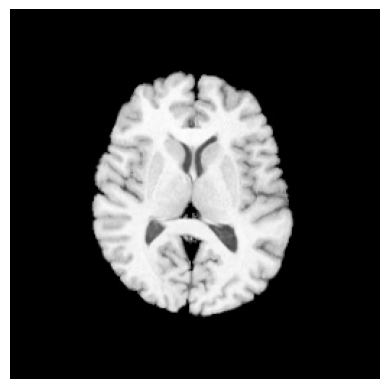

In [2]:
ants.plot(img2d)

### Adding overlays

You can add both continuous and discrete image overlays to your plot. This can help to visualize two images at once or the result of some algorithm applied to an image.

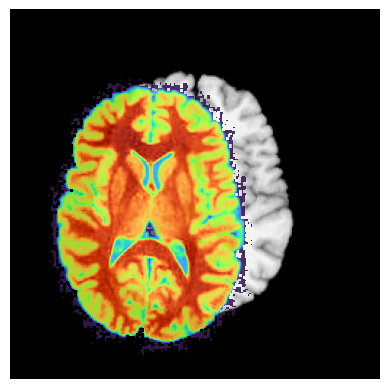

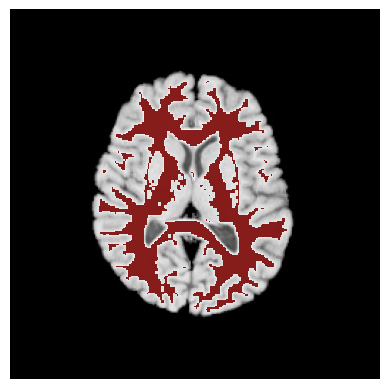

In [3]:
img2d_other = ants.image_read(ants.get_data('r64'))
ants.plot(img2d, img2d_other)

img2d_processed = img2d > 200
ants.plot(img2d, img2d_processed)

We see that by only keep higher intensity values that we are mostly left with the white matter.

## 3D images

While plotting a 2D is straight-forward, there is a little more to think about when plotting a 3D image. Firstly, you have to decide which axis of the image you want to plot along. And since medical images have an orientation, the axis (e.g., 0, 1, 2) which you choose to plot along will not necessarily always mean the same thing. 

Plotting a 3D image in ants will always happen with sensible defaults. So if you just need a quick look at your image, don't think too much about the possibilities.

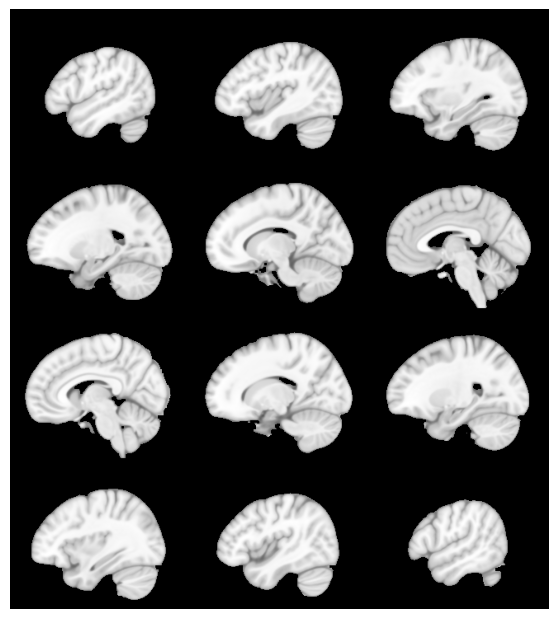

In [4]:
ants.plot(img3d)

Changing the axis will of course plot the image differently:

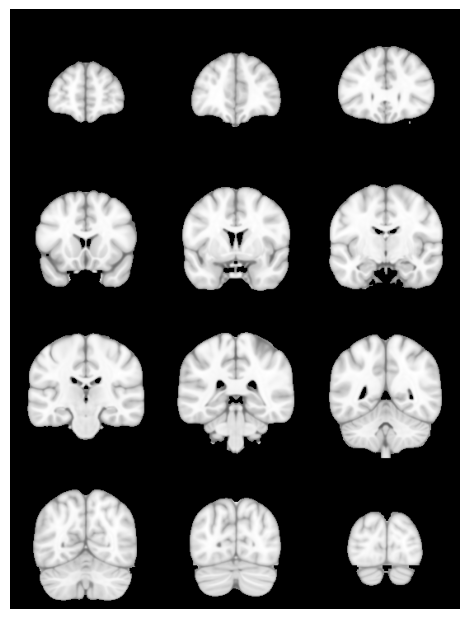

In [5]:
ants.plot(img3d, axis=1)

You can also change the way the slices are plotted to give you more or less granularity with your images.

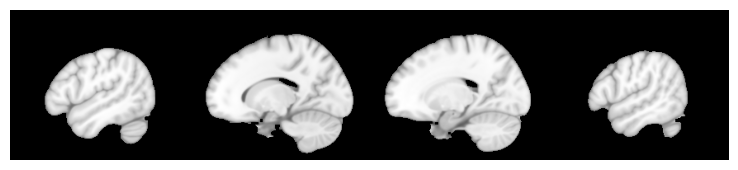

In [6]:
ants.plot(img3d, nslices=4)

### Orthogonal view

As you see, the default `ants.plot` function will take a 3D image and plot slices. But sometimes you need to look at all three dimensions at once to really understand the image. To do this, you can use the `ants.plot_ortho` function.

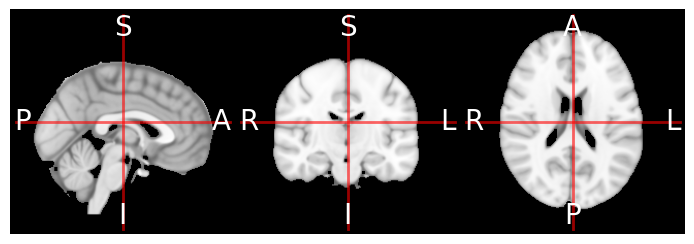

In [7]:
ants.plot_ortho(img3d, flat=True)

### Adding overlays

As with 2D images, adding overlays can be a good way to visualize images in the context of other images or processing results.

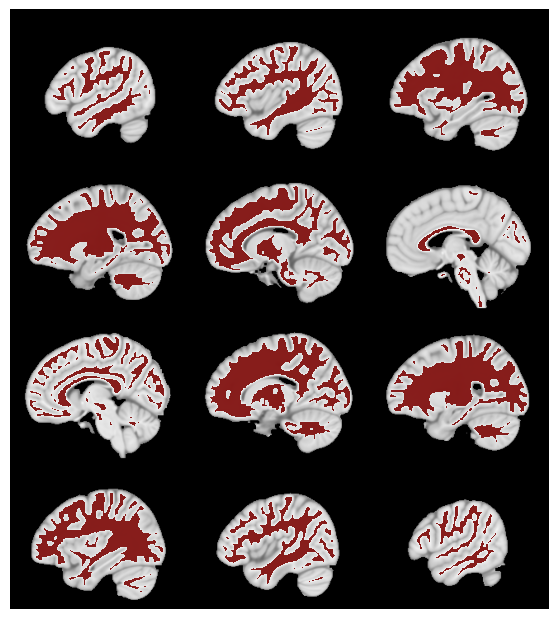

In [8]:
ants.plot(img3d, img3d > 6500)

## Grids

If you want to view images separately (rather than with an overlay) or if you want to plot more than one image at a time, you can use the `plot_grid` function. This function gives you enormous freedom to create publication-quality visualizations of your images.

## Histograms

Besides visualizing actual images with ants, you can also plot histograms of image intensities. This can be useful for understand how the contrast between different tissues in your image, for instance, or how generally intensity values are distributed.

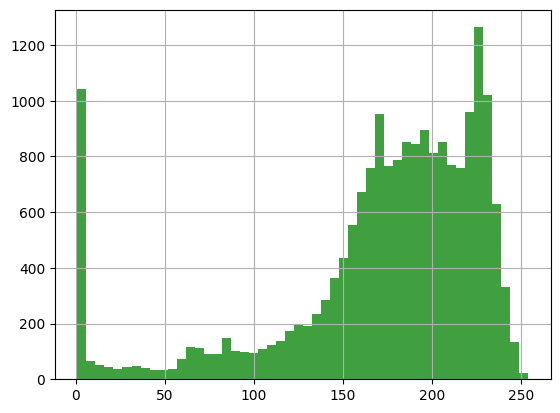

In [9]:
ants.plot_hist(img2d)

The image you see above is typically for brain images - a large number of zero pixels and then a fairly clear bimodal distribution where pixels representing white matter are much more intense than those representing gray matter. As you will see later, this can help to segment the tissues even though there is presumably a bit of overlap between the two groups.

## Other tools

The ants library is, of course, not the only way to visualize medical images. It is primarily meant to show static images that can either give you a quick understanding or to create figures for publications. If you want to visualize images dynamically and interactively, we recommend using `ITK-SNAP`.

ITK-SNAP is a standalone that can be downloaded and run from the desktop. It provides great functionality for visualizing 3D images with overlays. The only downside is that you have to load actual image files into the program, meaning you have to save images before visualizing them. This is why it's a bit less quick that using ants directly in python.

## Summary

In this section, you learned how to plot single 2D and 3D medical images on their own and with various types of overlay images. Plotting single images with discrete overlays, for example, is something you will do a ton if you train models for segmentation or classification. 

We also showed how to plot multiple images together in a grid. This is useful when you want to compare multiple images at once, of course. Finally, we demonstrated how you can visualize intensity histograms.

All of the plotting functionality is built on the `matplotlib` library. That means you can easily extend the existing functions or add your own with ease. To be a medical imaging AI expert, you have to be able to visualize images.